#### Name:G.Sriram <br> Roll : CS22B2020

##### 1.Train a SVM to learn an AND gate with two inputs x1 and x2. Assume that all the weights of the perceptron are initialized as 0. Show the calculation for each step and also draw the decision boundary for each update.


     pcost       dcost       gap    pres   dres
 0: -1.7500e+00 -4.2500e+00  8e+00  2e+00  2e+00
 1: -3.6653e+00 -4.3941e+00  1e+00  3e-01  3e-01
 2: -3.9945e+00 -4.0256e+00  3e-02  9e-16  2e-16
 3: -3.9999e+00 -4.0003e+00  3e-04  2e-15  3e-16
 4: -4.0000e+00 -4.0000e+00  3e-06  9e-16  7e-16
Optimal solution found.


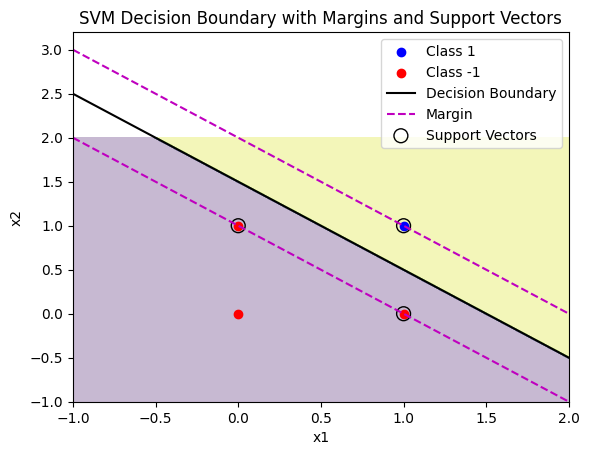

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

def compute_alphas(X, y):
    m, n = X.shape
    y = y.reshape(-1, 1)
    H = (y @ y.T) * (X @ X.T)
    H = np.array(H, dtype='double')
    P = cvxopt.matrix(H)
    q = cvxopt.matrix(-np.ones((m, 1), dtype='double'))
    G = cvxopt.matrix(-np.eye(m))
    h = cvxopt.matrix(np.zeros((m, 1), dtype='double'))
    A = cvxopt.matrix(y.T, (1, m), 'd')
    b = cvxopt.matrix(0.0)
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    alphas = np.array(solution['x']).flatten()
    return alphas

def train_svm(X, y):
    alphas = compute_alphas(X, y)
    support_indices = alphas > 1e-4
    support_vectors = X[support_indices]
    support_labels = y[support_indices]
    support_alphas = alphas[support_indices]
    w = (support_alphas * support_labels).reshape(-1, 1) * support_vectors
    w = w.sum(axis=0)
    b = support_labels - np.dot(support_vectors, w)
    b = b.mean()
    return w, b, support_vectors, support_labels, support_alphas

def plot_decision_boundary(X, y, w, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    
    # Plot decision boundary
    xx = np.linspace(x_min, x_max, 100)
    yy = -(w[0] * xx + b) / w[1]
    plt.plot(xx, yy, 'k-', label='Decision Boundary')
    
    # Plot margins
    margin = 1 / np.sqrt(np.sum(w**2))
    yy_neg = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
    yy_pos = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin
    plt.plot(xx, yy_neg, 'm--', label='Margin')
    plt.plot(xx, yy_pos, 'm--')
    
    # Highlight support vectors
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('SVM Decision Boundary with Margins and Support Vectors')
    plt.legend()
    plt.show()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, -1, -1, 1])

w, b, support_vectors, support_labels, support_alphas = train_svm(X, y)
plot_decision_boundary(X, y, w, b)

#### 2.  Train a single perceptron to learn the two classes in the following table.<br>where x1 and x2 are the inputs and ω is the target class. Assume that all the weights are initialized as 0 with learning rates 0.001, 0.01, 0.5 separately. Plot the samples and decision boundary. Also, tabulate the number of iterations required to converge the algorithm with these learning rates. 


Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:3
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.007
Iteration:4
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.003
Iteration:5
Feature vector:[0 1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:6
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:7
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:-0.003
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.001 0.001]
Bias:0.002
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.003
Weighted sum:0.003
Iteration:11
Feature vector:[2 2]
Current weights:[0

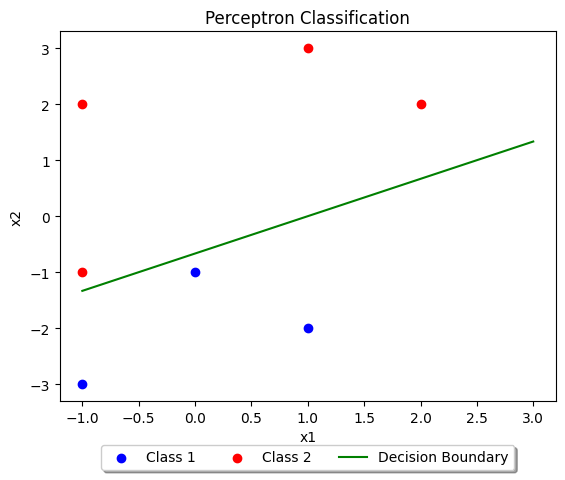

No of iterations for learning rate 0.001 is 48
Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:3
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.07
Iteration:4
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.03
Iteration:5
Feature vector:[0 1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:6
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:7
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:-0.03
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.01 0.01]
Bias:0.02
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.03
Weighted sum:0.03
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:0.03


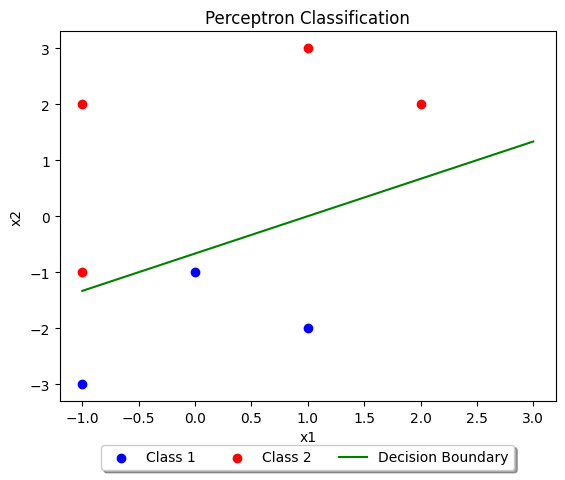

No of iterations for learning rate 0.01 is 48
Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:3
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:3.5
Iteration:4
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:1.5
Iteration:5
Feature vector:[0 1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:6
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:7
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:8
Feature vector:[-1 -1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:-1.5
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.5 0.5]
Bias:1.0
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:12
Feature vector:[1 3

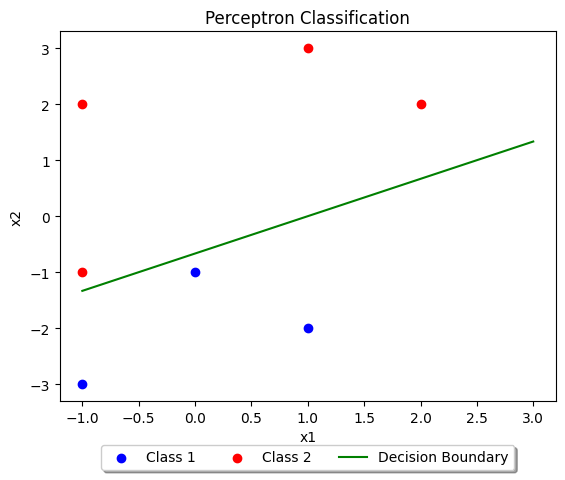

No of iterations for learning rate 0.5 is 48


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(a, data, learning_rate):
    # Transform data within the function
    trans_data = []
    for d in data:
        if d[2] == 2 or d[2] == 0:
            # For class 2, negate the features and assign a -1 bias
            trans_data.append([-d[0], -d[1], -1])
        else:
            # For class 1, retain positive features and assign a +1 bias
            trans_data.append([d[0], d[1], 1])
    
    trans_data = np.array(trans_data)
    i = 0
    count = 0
    iters = 1
    max_iters = 1000

    while True:
        transa = np.transpose(a)
        # Calculate the dot product
        err = transa @ trans_data[i]

        # Print computation details
        print(f"Iteration:{iters}")
        print(f"Feature vector:{trans_data[i][:2]}")
        print(f"Current weights:{a[:2]}")
        print(f"Bias:{a[2]}")
        print(f"Weighted sum:{err}")

        if err > 0:
            # If positive no need to update weights
            count += 1
            i = (i + 1) % len(trans_data)
        else:
            # If negative update the weights
            count = 0
            a = a + learning_rate * trans_data[i]

        # If everything is classified correctly or the maximum number of iterations is reached, break
        if count == len(trans_data) or iters > max_iters:
            break

        iters += 1

    # Array for final weights
    weight = np.array([a[0], a[1]])
    print("Final weights obtained:", weight)
    bias = a[2]
    print("Bias: ", bias)
    return weight, bias, iters

# Function to plot data points and decision boundary
def plot_perceptron_result(data, weights, bias, l1, l2):
    class1 = data[data[:, 2] == l1]
    class2 = data[data[:, 2] == l2]

    # Plotting data points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')

    # Generating decision boundary x-values
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]) + 1, 100)
    
    # Calculate the corresponding y-values for the decision boundary
    y_values = -(weights[0] * x_values + bias) / weights[1]

    # Plotting the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    # Setting labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)    
    plt.title('Perceptron Classification')
    plt.show()

# Writing given data
dataq2 = np.array([[2, 2, 1], [-1, -3, 0], [-1, 2, 1], [0, -1, 0], [1, 3, 1], [1, -2, 0], [-1, -1, 1]])
l1 = 0.001
l2 = 0.01
l3 = 0.5

# Learning rate 0.001
# Initialize weights
w3 = np.array([0, 0, 0])
weightsq2, biasq2, itersq2 = perceptron(w3, dataq2, l1)
plot_perceptron_result(dataq2, weightsq2, biasq2, 0, 1)
print(f"No of iterations for learning rate {l1} is {itersq2}")

# Learning rate 0.01
# Initialize weights
w = np.array([0, 0, 0])
weights, bias, iters2 = perceptron(w, dataq2, l2)
plot_perceptron_result(dataq2, weights, bias, 0, 1)
print(f"No of iterations for learning rate {l2} is {iters2}")

# Learning rate 0.5
# Initialize weights
w = np.array([0, 0, 0])
weightsq2, biasq2, iters3 = perceptron(w, dataq2, l3)
plot_perceptron_result(dataq2, weightsq2, biasq2, 0, 1)
print(f"No of iterations for learning rate {l3} is {iters3}")

#### 3. From the iris dataset, choose the ’petal length’, ’sepal width’ for setosa, versicolor and virginica flowers. Learn a decision boundary for the two features using a SVM. Assume that all the weights are initialized as 0 and learning rate as 0.01. Plot the samples and draw the decision boundary.
[Note: => Use iris.csv file in the attachments.
 =>  3 class classification problem.]


C:\Users\govin\AppData\Local\Temp\ipykernel_27356\891449918.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'] = label_encoder.fit_transform(df['Species'])


ValueError: invalid literal for int() with base 10: '$\\mathdefault{0}$'

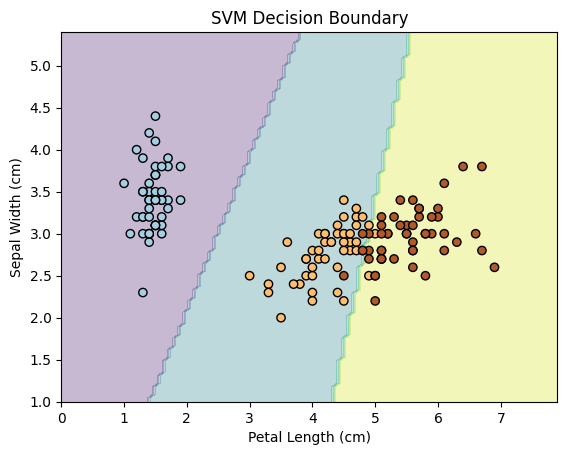

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset
iris_df = pd.read_csv('iris.csv')
df = iris_df[['PetalLengthCm', 'SepalWidthCm', 'Species']]

# Encode the species labels
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Prepare data for SVM training
X = df[['PetalLengthCm', 'SepalWidthCm']].values
y = df['Species'].values

# Train SVM with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# Plot the decision boundaries
def plot_decision_boundaries(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary')
    
    # Create a legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, label_encoder.inverse_transform([int(label) for label in labels]))
    
    plt.show()

plot_decision_boundaries(X, y, clf)


4. Use the attached classification dataset. 
Files in dataset:
cv-train.txt - Training instances + labels (200 rows x 58 cols)
cv-test.txt - Test instances + labels (50 rows x 58 cols)
Each line of these text files is a separate training example; the first 57 columns correspond to features, while the last column is the label (+1/ − 1).
	Train a SVM model to classify the features. Calculate the accuracy of the trained SVM model. 


In [11]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the training and test datasets
train_data = np.loadtxt('cv-train.txt')
test_data = np.loadtxt('cv-test.txt')

# Separate features and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Train SVM with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model: {accuracy * 100:.2f}%')

Accuracy of the SVM model: 84.00%


In [12]:
import numpy as np
import cvxopt
from sklearn.metrics import accuracy_score

# Load the training and test datasets
train_data = np.loadtxt('cv-train.txt')
test_data = np.loadtxt('cv-test.txt')

# Separate features and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]

# Function to train SVM using quadratic programming
def train_svm(X, y, C=1.0):
    m, n = X.shape
    y = y.reshape(-1, 1) * 1.0
    X_dash = y * X
    H = np.dot(X_dash, X_dash.T) * 1.0

    P = cvxopt.matrix(H)
    q = cvxopt.matrix(-np.ones((m, 1)))
    G = cvxopt.matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt.matrix(y.reshape(1, -1))
    b = cvxopt.matrix(np.zeros(1))

    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    alphas = np.array(solution['x']).flatten()
    return alphas

# Function to calculate weights and bias
def calculate_weights_bias(X, y, alphas):
    w = np.sum(alphas[:, None] * y[:, None] * X, axis=0)
    S = (alphas > 1e-4)
    b = np.mean(y[S] - np.dot(X[S], w))
    return w, b

# Train the SVM
alphas = train_svm(X_train, y_train)
w, b = calculate_weights_bias(X_train, y_train, alphas)

# Predict function
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Predict on the test set
y_pred = predict(X_test, w, b)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model: {accuracy * 100:.2f}%')

Accuracy of the SVM model: 84.00%
